# Homework2

Please upload to Moodle a .zip archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a requirements.txt file which lists all the packages that you have used for your homework, one package per line (e.g., pandas). This will allow us to install all required packages in one go, by using "pip install -r requirements.txt".

Please name your .zip archive using your full name and student id as follows - *Firstnme_Lastname_12345678_COMP47350_Homework2.zip*. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Moodle.

Your code and analysis is like a story that awaits to be read, make it a nice story please!

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    - .txt
    - .html
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will be ignored and not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Sunday, April 16, 2017, midnight.** 

## Exercises

This homework focuses on building and evaluating prediction models for a particular problem and dataset.
The problem and data come from the Amazon online shopping platform. Several sellers can sell the same product on Amazon. Based on the data provided by the seller to Amazon (seller reputation, product price, shipping details, etc) Amazon ranks seller offers from best to worst for a given product. This ranking is mostly influenced by the product price offer of the seller, but it can also be influenced by other features. We first need to understand which features are most indicative of a seller being ranked first by Amazon for a product. When the seller is ranked first for a product we say that the seller is the 'winner' among all the offers, because their offer is shown first when a user searches for a product on Amazon, which increases their chances of selling the product. Our goal is to work with the data to build and evaluate prediction models that capture the relationship between descriptive features and the target feature 'IsWinner'.

We use the same dataset from Homework1 (you can use your cleaned/prepared CSV or the raw dataset), a CSV file describing offers by given sellers for given products and a column which records whether an offer was a winner or not.

(1). [25] Data Understanding: Exploring relationships between feature pairs:
    - (1.1) [5] Print the correlations between the continuous features.
    - (1.2) [5] Plot the scatter plots of each pair of continuous descriptive feature and target feature.
    - (1.3) [5] Discuss what you observe from the scatter plots and correlations, e.g., which continuous features seem to be better at predicting the target feature. Choose a subset of continuous features you find promising. Justify your choices.
    - (1.4) [5] For each categorical feature, plot the pairwise interaction with the target feature (barplots or stacked barplots).
    - (1.5) [5] Discuss what knowledge you gain from plotting the interaction of descriptive categorical features and the target feature, e.g., which categorical features seem to be better at predicting the target feature. Choose a subset of categorical features you find promising. Justify your choices.
    
(2). [15] Predictive Modeling: Linear Regression  
    - (2.1) [5] Train a linear regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (2.2) [2.5] Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g., interpret the model).    
    - (2.3) [2.5] Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set.
    - (2.4) [5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Threshold the predicted target feature value at 0.5 to get the predicted class for each example. 

(3). [15] Predictive Modeling: Logistic Regression  
    - (3.1) [5] Train a logistic regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (3.2) [5] Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g., interpret the model).    
    - (3.3) [2.5] Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set.
    - (3.4) [2.5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example.
    
(4). [20] Predictive Modeling: Random Forest 
    - (4.1) [5] Train a random forest model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set.   
    - (4.2) [5] Print the features ranked by random forest importance. Discuss your findings and choose a subset of features you find promising.
    - (4.3) [5] Retrain the model using only the subset of features found to be promising. Evaluate the quality of the model on the training set.
    - (4.4) [5] Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example.
    
(5). [25] Evaluating Predictive Models
    - (5.1) [10] Split the dataset into 70% training and remaining 30% test. Train all models from the previous exercises using the new training set and evaluate their quality on the new test set. Print classification evaluation metrics for all models on the test set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1). Discuss how does evaluation on the test set compare to evaluation using the full data for training and also for testing.
    - (5.2) [15] Summarize and try to improve your results so far:
        - (5.2.1) [5] Which model performs best and is it more accurate than a simple (but useless) model that always predicts IsWinner=0? Justify your answers.
        - (5.2.2) [10] Discuss your understanding of the problem and predictive modeling results so far. Can you find any tricks to improve the best model so far (e.g., using feature significance, feature re-scaling, creating new features, combining models, or other knowledge)?

In [320]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages
matplotlib.style.use('ggplot')
import seaborn as sns
import sklearn
import statsmodels.formula.api as sm
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score

%matplotlib inline

In [432]:
df = pd.read_csv('amazon-offers-10k-samples-new2.csv', encoding = "ISO-8859-1")

### Tidying Up the Data

In [433]:
# Dropping columns unamed(created as a result of reading in the csv)
# Dropping ProductId, TimeOfOfferChange, ConditionNotes, IsFulfilledByAmazon
# and SellerId. 
# These are still present in the csv - so I haven't removed them completely
# Just from the data frame for the purposes of creating predictive models
df.drop(df.columns[[0, 2, 3, 4, 6, 10]], axis = 1, inplace = True)

In [323]:
df.head()

IsWinner  IsFeaturedMerchant  ListingPrice  SellerFeedbackRating  \
0         1                   1        107.35                    95   
1         0                   1        100.46                    98   
2         0                   1         99.24                    95   
3         0                   0        109.48                    94   
4         0                   0        116.70                    67   

   SellerFeedbackCount  ShippingPrice  ShippingTime_minHours  \
0                 4078           0.00                     48   
1                  478           6.99                     24   
2                 4384          11.67                     24   
3                  105           8.99                     24   
4                    9           6.98                     24   

   ShippingTime_maxHours ShipsFromCountry ShipsFromState  
0                     72               CA             ON  
1                     48               CA             ON  
2                     48               CA             ON  
3                     48               CA             ON  
4                     48               CA             AB

In [324]:
# Double check for null values (shouldn't be any - removed them in the last assignment)
df.isnull().sum()

IsWinner                 0
IsFeaturedMerchant       0
ListingPrice             0
SellerFeedbackRating     0
SellerFeedbackCount      0
ShippingPrice            0
ShippingTime_minHours    0
ShippingTime_maxHours    0
ShipsFromCountry         0
ShipsFromState           0
dtype: int64

In [325]:
# Identify outliers in Listing Price
# Results look normal - there is a gradual decrease in price
df.sort_values(by='ListingPrice', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

IsWinner  IsFeaturedMerchant  ListingPrice  SellerFeedbackRating  \
2865         0                   1       2999.00                    95   
73           0                   1       2999.00                    95   
2684         0                   0       2617.92                    96   
2683         0                   1       2237.85                    93   
2290         0                   0       2093.77                    98   

      SellerFeedbackCount  ShippingPrice  ShippingTime_minHours  \
2865                 4385          12.52                     24   
73                   4384          12.12                     24   
2684                 1790           9.98                     96   
2683                 2521         269.65                     24   
2290                 1446           0.00                     24   

      ShippingTime_maxHours ShipsFromCountry ShipsFromState  
2865                     48               CA             ON  
73                       48               CA             ON  
2684                    120               US             NY  
2683                     48               US             VA  
2290                     48               US             CA

In [326]:
# Identify outliers at the other end for Listing Price
# This also looks fine - There are no zero values. 
df.sort_values(by='ListingPrice', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last').head(5)

IsWinner  IsFeaturedMerchant  ListingPrice  SellerFeedbackRating  \
393          0                   1          3.24                   100   
75           0                   1          3.94                    95   
4727         0                   1          3.94                    95   
3591         0                   0          4.57                    98   
1469         0                   0          4.86                    98   

      SellerFeedbackCount  ShippingPrice  ShippingTime_minHours  \
393                     2          30.22                     24   
75                   2283           8.07                    144   
4727                 2283           8.07                    144   
3591                 3293           7.99                     24   
1469                 3293           7.99                     24   

      ShippingTime_maxHours ShipsFromCountry ShipsFromState  
393                      48               US             NH  
75                      240               CA             BC  
4727                    240               CA             BC  
3591                     48               US             NY  
1469                     48               US             NY

In [327]:
# Identify outliers in Seller Feedback Rating
# Looks fine also - 100 is the maximum that should be possible
df.sort_values(by='SellerFeedbackRating', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

IsWinner  IsFeaturedMerchant  ListingPrice  SellerFeedbackRating  \
4201         0                   1        105.81                   100   
1567         0                   1         55.98                   100   
4340         0                   1        444.53                   100   
2830         0                   1         99.61                   100   
3439         0                   0         92.75                   100   

      SellerFeedbackCount  ShippingPrice  ShippingTime_minHours  \
4201                  384          13.08                     24   
1567                  384          13.86                     24   
4340                  384          20.26                     24   
2830                 4601           0.00                     24   
3439                  384          13.09                     24   

      ShippingTime_maxHours ShipsFromCountry ShipsFromState  
4201                     48               CA             ON  
1567                     48               CA             ON  
4340                     48               CA             ON  
2830                     48               CA             ON  
3439                     48               CA             ON

In [328]:
# Now here we can see a lot of zeros - are these legitimate zero ratings or lack or rating? 
# Either way it does provide us with useful information if it correlates with the target feature
df.sort_values(by='SellerFeedbackRating', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last').head(5)

IsWinner  IsFeaturedMerchant  ListingPrice  SellerFeedbackRating  \
5130         0                   0        144.70                     0   
1481         0                   0        240.10                     0   
2990         0                   0        216.32                     0   
2987         0                   0        188.25                     0   
4511         0                   0         95.81                     0   

      SellerFeedbackCount  ShippingPrice  ShippingTime_minHours  \
5130                    0          58.00                     48   
1481                    0           6.98                     96   
2990                    0           5.54                     48   
2987                    0           5.54                     96   
4511                    0           5.54                    504   

      ShippingTime_maxHours ShipsFromCountry ShipsFromState  
5130                     72               US             CA  
1481                    120               US             FL  
2990                     72               US             CA  
2987                    120               US             PA  
4511                    720               CA             ON

In [329]:
# Identify outliers in Shipping Price
# Looks fine, decreases at a normal enough rate. No outstanding values at the top. 
df.sort_values(by='ShippingPrice', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

IsWinner  IsFeaturedMerchant  ListingPrice  SellerFeedbackRating  \
531          0                   1        929.02                    93   
2137         0                   1        929.02                    93   
4251         0                   1        929.02                    93   
2683         0                   1       2237.85                    93   
764          0                   1        575.25                    93   

      SellerFeedbackCount  ShippingPrice  ShippingTime_minHours  \
531                  2521         335.35                     24   
2137                 2521         335.35                     24   
4251                 2521         335.35                     24   
2683                 2521         269.65                     24   
764                  2521         252.25                     24   

      ShippingTime_maxHours ShipsFromCountry ShipsFromState  
531                      48               US             VA  
2137                     48               US             VA  
4251                     48               US             VA  
2683                     48               US             VA  
764                      48               US             VA

In [330]:
# Identify outliers in Shipping Price at the lower end
# Again there are a lot of zeros, but this could be legitimate because it's not uncommon 
# to get free shipping on Amazon
df.sort_values(by='ShippingPrice', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last').head(5)

IsWinner  IsFeaturedMerchant  ListingPrice  SellerFeedbackRating  \
0            1                   1        107.35                    95   
2741         0                   0        471.32                    98   
2742         0                   0        481.98                    94   
2743         0                   1        498.01                    95   
2750         0                   1        570.44                    96   

      SellerFeedbackCount  ShippingPrice  ShippingTime_minHours  \
0                    4078            0.0                     48   
2741                   63            0.0                     24   
2742                  105            0.0                     24   
2743                 4078            0.0                     48   
2750                35270            0.0                     96   

      ShippingTime_maxHours ShipsFromCountry ShipsFromState  
0                        72               CA             ON  
2741                     48               CA             ON  
2742                     48               CA             ON  
2743                     72               CA             ON  
2750                    120               CA             QC

In [331]:
# Identify outliers for Shipping Times - more likely to be at the lower end
# Looks fine - minimum is 24hrs which seems reasonable for domestic shipping
df.sort_values(by='ShippingTime_minHours', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last').head(5)

IsWinner  IsFeaturedMerchant  ListingPrice  SellerFeedbackRating  \
2925         0                   0        499.00                    93   
3296         0                   1         78.09                   100   
3297         0                   1         87.59                    98   
3298         0                   1         86.72                    96   
3301         0                   1         80.13                    93   

      SellerFeedbackCount  ShippingPrice  ShippingTime_minHours  \
2925                 3182          30.50                     24   
3296                  384          13.27                     24   
3297                  478           6.99                     24   
3298                 7090           9.95                     24   
3301                 2521          21.45                     24   

      ShippingTime_maxHours ShipsFromCountry ShipsFromState  
2925                     48               CA             ON  
3296                     48               CA             ON  
3297                     48               CA             ON  
3298                     48               CA             ON  
3301                     48               US             VA

In [332]:
# Identify outliers for Shipping Times - more likely to be at the higher end
# 720 hours (30 days) does seem high but as there are a few instances of that time
# And the ShipsFromCountry is Canada I'll make the decision that it passes the sanity check
df.sort_values(by='ShippingTime_maxHours', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

IsWinner  IsFeaturedMerchant  ListingPrice  SellerFeedbackRating  \
5352         0                   0        376.68                     0   
1883         0                   0        376.68                     0   
4757         0                   0        376.68                     0   
5630         0                   0        376.68                     0   
2982         0                   0        105.97                     0   

      SellerFeedbackCount  ShippingPrice  ShippingTime_minHours  \
5352                    0           5.54                    504   
1883                    0           5.54                    504   
4757                    0           5.54                    504   
5630                    0           5.54                    504   
2982                    0           5.54                    504   

      ShippingTime_maxHours ShipsFromCountry ShipsFromState  
5352                    720               CA             ON  
1883                    720               CA             ON  
4757                    720               CA             ON  
5630                    720               CA             ON  
2982                    720               CA             ON

# Question 1. Data Understanding: Exploring Relationships Between Feature Pairs

## 1.1 Print the correlations between the continuous features

In [333]:
sns.set(style='white')
continuous_features = df[['SellerFeedbackRating', 'SellerFeedbackCount', 'ListingPrice', 'ShippingPrice', 'ShippingTime_minHours', 'ShippingTime_maxHours']].columns
corr = df[continuous_features].corr()
print(corr)

                       SellerFeedbackRating  SellerFeedbackCount  \
SellerFeedbackRating               1.000000             0.105576   
SellerFeedbackCount                0.105576             1.000000   
ListingPrice                      -0.037842            -0.001166   
ShippingPrice                     -0.005308            -0.202074   
ShippingTime_minHours             -0.163926             0.295287   
ShippingTime_maxHours             -0.176798             0.212978   

                       ListingPrice  ShippingPrice  ShippingTime_minHours  \
SellerFeedbackRating      -0.037842      -0.005308              -0.163926   
SellerFeedbackCount       -0.001166      -0.202074               0.295287   
ListingPrice               1.000000       0.215024               0.038674   
ShippingPrice              0.215024       1.000000              -0.016701   
ShippingTime_minHours      0.038674      -0.016701               1.000000   
ShippingTime_maxHours      0.032914       0.036349           

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5]),
 <a list of 6 Text xticklabel objects>)

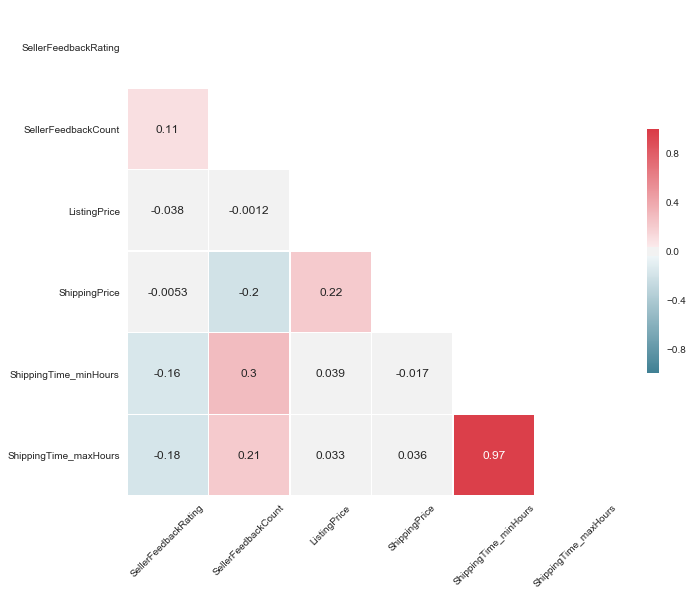

In [334]:
# A nicer representation of correlations
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

## 1.2 Plot the scatter plots of each pair of continuous descriptive feature and target feature

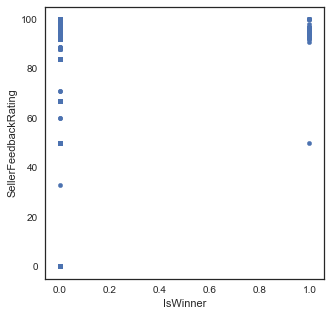

In [335]:
% matplotlib inline
df.plot(kind='scatter', x='IsWinner', y='SellerFeedbackRating', figsize=(5, 5))

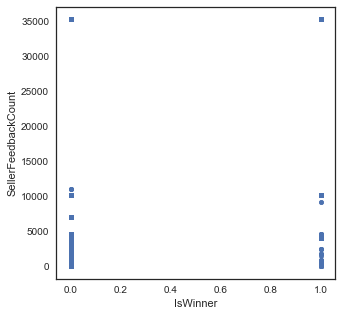

In [336]:
df.plot(kind='scatter', x='IsWinner', y='SellerFeedbackCount', figsize=(5, 5))

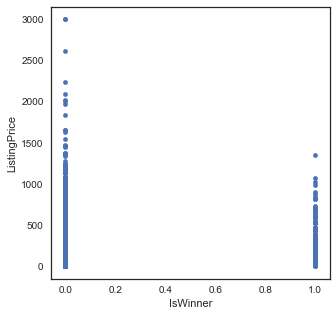

In [337]:
df.plot(kind='scatter', x='IsWinner', y='ListingPrice', figsize=(5, 5))

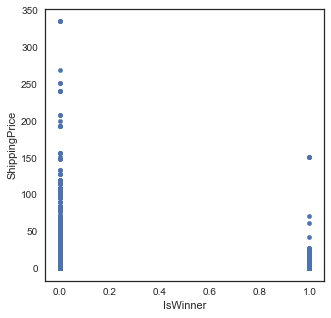

In [338]:
df.plot(kind='scatter', x='IsWinner', y='ShippingPrice', figsize=(5, 5))

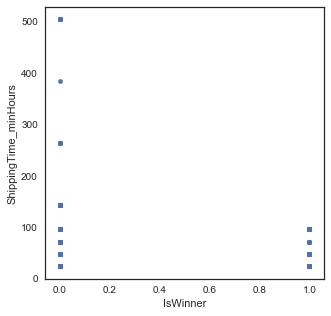

In [339]:
df.plot(kind='scatter', x='IsWinner', y='ShippingTime_minHours', figsize=(5, 5))

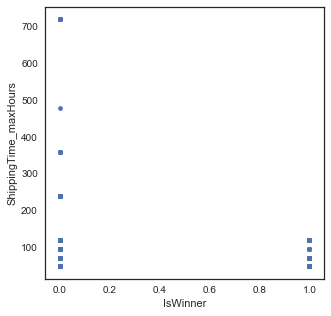

In [340]:
df.plot(kind='scatter', x='IsWinner', y='ShippingTime_maxHours', figsize=(5, 5))

## 1.3 Discuss what you observe from the scatter plots and correlations, e.g., which continuous features seem to be better at predicting the target feature. 

1. From the above plots we can see that in order to be a winning offer an offer must have a Seller Feedback Rating above (approx 90) and Listing Price must be under (approx \$1000) however cases within these bounds are not always Winners. While Shipping Price must be under (approx \$90) in order for an offer to be a winner. 

2. If we look at the correlations between continuous features, we can see that Seller Feedback Count is the only feature which has a positive impact on Seller Feedback Rating, while Shipping Price, Shipping Time Min and Shipping Time Max are the features which have a positive impact on Listing Price. 

3. In addition to that we can see from the scatter plots that winning offers only occur when the Shipping Time is low. 

Note: What we see here are not black and white relationships - there is no one or two features that have a cut off point between winning offers and non winning offers. 

### Choose a subset of continuous features you find promising. Justify your choices. 

Based on the above analysis I think that the most promising fatures are Seller Feedback Rating and Listing Price. 
The results of Shipping Time Max are very similar to Shipping Time Min so I believe there is an overlap of information here. 

I am choosing these features because they have the strongest correlation between themselves and the target feature. I am limiting it to a small subset because after much initial testing I was unable to get an effective model predicting a positive case with a larger subset. 

## 1.4 For each categorical feature, plot the pairwise interaction with the target feature (barplots or stacked barplots). 

In [341]:
%matplotlib inline

#define our categorical features
categorical_features = ['IsFeaturedMerchant',
                        'ShipsFromCountry', 'ShipsFromState']

categorical_columns = df[categorical_features].columns


(0, 100)

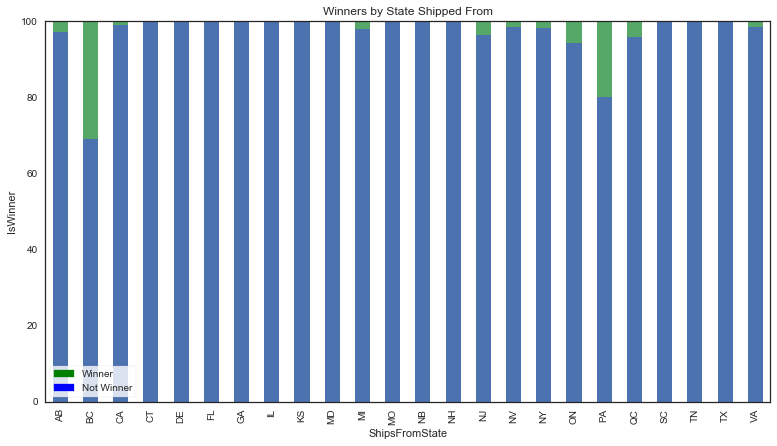

In [342]:
# Find unique values in ShipsFromState

states = pd.unique(df.ShipsFromState.ravel())

# Insert a new column called 'percent' and fill it with 0s
df['percent'] = 0

# Iterate through the unique values in State and for each value count the amount of winners
# Find the indexes of each row with a particular state and for each of these row insert count * 100 in the percent column
for s in states:
    count = 1 / df[df.ShipsFromState == s].count()['IsWinner']
    index_list = df[df['ShipsFromState'] == s].index.tolist()
    for i in index_list:
        df.loc[i, 'percent'] = count * 100


category_group = df[['percent', 'ShipsFromState','IsWinner']].groupby(['ShipsFromState','IsWinner']).sum()

my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Winners by State Shipped From", figsize=(13,7))

red_patch = mpatches.Patch(color='green', label='Winner')
blue_patch = mpatches.Patch(color='blue', label='Not Winner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

my_plot.set_xlabel("ShipsFromState")
my_plot.set_ylabel("IsWinner")
my_plot.set_ylim([0,100])


(0, 100)

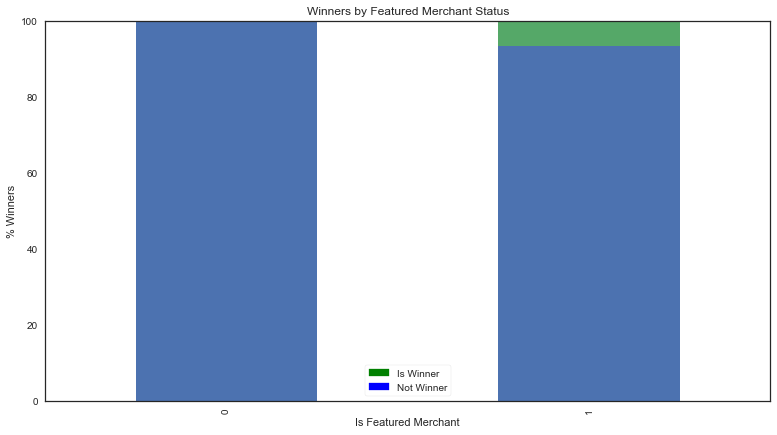

In [343]:
# Count the number of female candidates
featured = 1 / df[df.IsFeaturedMerchant == 1].count()['IsFeaturedMerchant']

# Counts the number of male candidates
not_featured = 1 / df[df.IsFeaturedMerchant == 0].count()['IsFeaturedMerchant']

# Create a new column in the dataframe called percent and insert male_count in all cells
df['percent'] = not_featured * 100

# Find indexes of all rows containing value Female for Gender
index_list = df[df['IsFeaturedMerchant'] == 1].index.tolist()

# For each row with a 'female' value, insert female_count in the percent column
for i in index_list:
    df.loc[i, 'percent'] = featured * 100

# Group dataframe by Gender and Elected and sum precent
category_group = df[['percent','IsFeaturedMerchant','IsWinner']].groupby(['IsFeaturedMerchant','IsWinner']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Winners by Featured Merchant Status", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='Is Winner')
blue_patch = mpatches.Patch(color='blue', label='Not Winner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("Is Featured Merchant")
my_plot.set_ylabel("% Winners")
my_plot.set_ylim([0,100])

#by looking at this - we cannot confidently say that if a product is a featured merchant that it will be a winning offer 
#but we can say that if it is not a featured merchant it definitely won't be a winning offer

(0, 100)

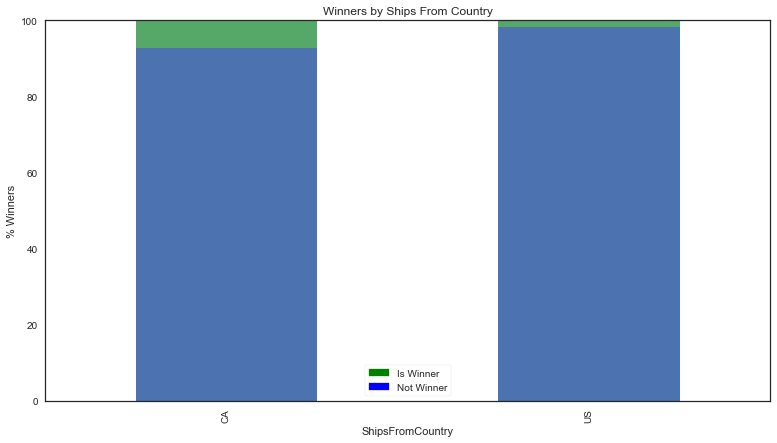

In [344]:
# Count the number of female candidates
count_CA = 1 / df[df.ShipsFromCountry == 'CA'].count()['ShipsFromCountry']

# Counts the number of male candidates
count_US = 1 / df[df.ShipsFromCountry == 'US'].count()['ShipsFromCountry']

# Create a new column in the dataframe called percent and insert male_count in all cells
df['percent'] = count_US * 100

# Find indexes of all rows containing value Female for Gender
index_list = df[df['ShipsFromCountry'] == 'CA'].index.tolist()

# For each row with a 'female' value, insert female_count in the percent column
for i in index_list:
    df.loc[i, 'percent'] = count_CA * 100

# Group dataframe by Gender and Elected and sum precent
category_group = df[['percent','ShipsFromCountry','IsWinner']].groupby(['ShipsFromCountry','IsWinner']).sum()

# Plot values of category_group in a stacked bar chart
my_plot = category_group.unstack().plot(kind='bar', stacked=True, title="Winners by Ships From Country", figsize=(13,7))

# Define legend colours and text and add to the plot
red_patch = mpatches.Patch(color='green', label='Is Winner')
blue_patch = mpatches.Patch(color='blue', label='Not Winner')
my_plot.legend(handles=[red_patch, blue_patch], frameon = True)

# Define x and y labels and min and max values for the y axis
my_plot.set_xlabel("ShipsFromCountry")
my_plot.set_ylabel("% Winners")
my_plot.set_ylim([0,100])

## 1.5 Discuss what knowledge you gain from plotting the interaction of descriptive categorical features and the target feature, e.g., which categorical features seem to be better at predicting the target feature. 

1. Ships From State seems to be the most informative - there are a high number of winners from BC and PA. 
2. Is Featured Merchant gives some indication - there are no winners in instances where the offer is not a featured merchant.
3. There are a higher percentage of winners respectively in the offers shipped from Canada than the US. 

### Choose a subset of categorical features you find promising. Justify your choices. 

I'm going to choose the subset of features Is Featured Merchant, Ships From BC and Ships From PA. These are the features that have the highest number of instances of the target feature. Is Featured Merchant also makes sense from a general perspective. 

## Data Preparation

Before we go ahead and train the models, we need to do something with the categorical features - so we will create dummies for them and treat them as individual features. 

We also need to drop the features we have decided not to include as part of our model. 

In [345]:
df.drop(df.columns[[4, 6, 7, 10]], axis = 1, inplace = True)

In [346]:
ShipsFromState_dummies = pd.get_dummies(df.ShipsFromState, prefix='ShipsFrom').iloc[:, :]
df = pd.concat([df, ShipsFromState_dummies], axis=1)
#I know that we would normally not use the first dummy but I wasn't sure whether that was the case in a complex feature like this

In [347]:
ShipsFromCountry_dummies = pd.get_dummies(df.ShipsFromCountry, prefix ='ShipsFromCountry').iloc[:, :]
df = pd.concat([df, ShipsFromCountry_dummies], axis = 1)

In [348]:
df.columns

Index(['IsWinner', 'IsFeaturedMerchant', 'ListingPrice',
       'SellerFeedbackRating', 'ShippingPrice', 'ShipsFromCountry',
       'ShipsFromState', 'ShipsFrom_AB', 'ShipsFrom_BC', 'ShipsFrom_CA',
       'ShipsFrom_CT', 'ShipsFrom_DE', 'ShipsFrom_FL', 'ShipsFrom_GA',
       'ShipsFrom_IL', 'ShipsFrom_KS', 'ShipsFrom_MD', 'ShipsFrom_MI',
       'ShipsFrom_MO', 'ShipsFrom_NB', 'ShipsFrom_NH', 'ShipsFrom_NJ',
       'ShipsFrom_NV', 'ShipsFrom_NY', 'ShipsFrom_ON', 'ShipsFrom_PA',
       'ShipsFrom_QC', 'ShipsFrom_SC', 'ShipsFrom_TN', 'ShipsFrom_TX',
       'ShipsFrom_VA', 'ShipsFromCountry_CA', 'ShipsFromCountry_US'],
      dtype='object')

In [349]:
#now we can drop ShipsFromState and ShipsFromCountry as well as the Dummy columns for features we are not considering
df.drop(df.columns[[4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32]], axis = 1, inplace = True)

# Question 2: Predictive Modeling: Linear Regression

## 2.1 Train a linear regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set. 

In [350]:
feature_cols = ['IsFeaturedMerchant', 'ListingPrice', 'SellerFeedbackRating', 'ShipsFrom_BC', 'ShipsFrom_PA']

lm = sm.ols(formula = "IsWinner ~ ListingPrice + SellerFeedbackRating + ShipsFrom_BC + ShipsFrom_PA + IsFeaturedMerchant", data = df).fit()

## Evaluate the quality of the model on the training set

I was initially assigning the predictions to a class by first creating the data frame with the actual class and predicted class and then iterating through that data frame and checking the values - but I realised that the values weren't be accessed correctly and my generalized else clause was causing everything to be put into the negative class. Below is the fix for this problem - creating a list of predictions that are converted to a binary predicted class and then creating the data frame using that list instead of the original predictions. Converting to binary was necessary because otherwise I got a 'cannot deal with mix of continuous and binary' error when trying to create the confusion matrix.

In [351]:
#get the predictions
lm_predictions = lm.predict(df[feature_cols])
predicted_class = list()
for i in lm_predictions:
    if i >= 0.5:
        predicted_class.append(1)
    else:
        predicted_class.append(0)
        
df_true_vs_lm_predicted = pd.DataFrame({'ActualClass': df.IsWinner, 'PredictedClass': predicted_class})

In [352]:
accuracy = metrics.accuracy_score(df_true_vs_lm_predicted["ActualClass"], df_true_vs_lm_predicted["PredictedClass"])
confusion_matrix = metrics.confusion_matrix(df_true_vs_lm_predicted["ActualClass"], df_true_vs_lm_predicted["PredictedClass"])
class_report = metrics.classification_report(df_true_vs_lm_predicted["ActualClass"], df_true_vs_lm_predicted["PredictedClass"])

C:\Users\pamel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [353]:
print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion_matrix)
print("Classification report:\n ", class_report)

Accuracy:  0.948043069561
Confusion matrix: 
 [[5547    0]
 [ 304    0]]
Classification report:
               precision    recall  f1-score   support

          0       0.95      1.00      0.97      5547
          1       0.00      0.00      0.00       304

avg / total       0.90      0.95      0.92      5851



In [354]:
#Investigating the reliability of our accuracy score
winners = 0
for index, row in df.iterrows():
    if df["IsWinner"][index] == 1:
        winners += 1

percentage_winners = (winners/5581) * 100
print("Percentage of winning offers: ", percentage_winners, "%")

Percentage of winning offers:  5.4470524995520515 %


### Evaluation Analysis: 

We can see from the above that the model is not a good one. The accuracy score here is misleading because it indicates that we have 90% accuracy. However this is a false accuracy because the model is predicting everything as negative - and because the percentage of "winners" in the data set is only 5% the model comes through as 90% accurate. But in fact, it is a very bad model, because it is not successfully predicting any cases in the positive class - and we can confirm this by looking at the confusion matrix. 

## 2.2 Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model. 

In [355]:
lm.params

Intercept               0.000245
ListingPrice            0.000003
SellerFeedbackRating   -0.000019
ShipsFrom_BC            0.259856
ShipsFrom_PA            0.189775
IsFeaturedMerchant      0.050335
dtype: float64

In [356]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               IsWinner   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     104.1
Date:                Tue, 18 Apr 2017   Prob (F-statistic):          1.40e-105
Time:                        22:10:30   Log-Likelihood:                 755.21
No. Observations:                5851   AIC:                            -1498.
Df Residuals:                    5845   BIC:                            -1458.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.0002      0.022      0.011      0.991        -0.042     0.043
ListingPrice          3.109e-06   1.11e-05      0.279      0.780     -1.87e-05  2.49e-05
SellerFeedbackRating -1.935e-05      0.000     -0.082      0.935        -0.000     0.000
ShipsFrom_BC             0.2599      0.013     20.468      0.000         0.235     0.285
ShipsFrom_PA             0.1898      0.097      1.963      0.050         0.000     0.379
IsFeaturedMerchant       0.0503      0.007      7.129      0.000         0.036     0.064
==============================================================================
Omnibus:                     4356.316   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55953.292
Skew:                           3.640   Prob(JB):                         0.00
Kurtosis:                      16.286   Cond. No.                     1.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Statistical Significance:

#### Looking at Coefficients:

1. From the coefficients we can see that ShipsFrom_BC, ShipsFrom_PA and Featured Merchant have the most affect on the likelyhood of an offer being a 'winner'. 
2. While Listing Price has a much lower coefficient in this model and Seller Feedback Rating has a negative. 

Reference for interpreting coefficients: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

#### Looking at P-Values:

1. By looking at the P-Values we can see that ShipsFrom_BC, ShipsFrom_PA and Featured Merchant are again the most statistically significant features. As they all have a P-Value below 0.5. 

2. The r-squared value is quite low indicating that I have underfitted the model. 

#### What next? 

With the above in mind, I am going to look at the features IsFeaturedMerchant, ShipsFrom_BC and ShipsFrom_PA as these are stastically significant both in terms of their coefficients and their P-Values. 

## 2.3 Retrain the model using only the subset of features found to be statistically significant. Evaluate the quailty of the model on the training set. 

In [357]:
feature_cols_2 = ['IsFeaturedMerchant', 'ShipsFrom_BC', 'ShipsFrom_PA']
df_new = df[['IsWinner', 'IsFeaturedMerchant', 'ShipsFrom_BC', 'ShipsFrom_PA']]

lm_2 = sm.ols(formula="IsWinner ~ IsFeaturedMerchant + ShipsFrom_BC + ShipsFrom_PA", data=df_new).fit()


In [358]:
#printing the predicted target feature value for next question before thresholding
lm2_predictions = lm_2.predict(df_new[feature_cols_2])

In [359]:
# Threshold at 0.5 and put in appropriate predicted class
predicted_class = list()
for i in lm2_predictions:
    if i >= 0.5:
        predicted_class.append(1)
    else:
        predicted_class.append(0)

In [360]:
#lm2_predictions = lm_2.predict(df_new[feature_cols_2])
df_true_vs_lm2_predicted = pd.DataFrame({'ActualClass': df_new.IsWinner, 'PredictedClass': predicted_class})
df_true_vs_lm2_predicted

ActualClass  PredictedClass
0               1               0
1               0               0
2               0               0
3               0               0
4               0               0
5               0               0
6               0               0
7               0               0
8               0               0
9               0               0
10              0               0
11              0               0
12              0               0
13              1               0
14              0               0
15              0               0
16              0               0
17              0               0
18              0               0
19              0               0
20              0               0
21              0               0
22              0               0
23              0               0
24              0               0
25              1               0
26              0               0
27              0               0
28              0               0
29              0               0
...           ...             ...
5821            0               0
5822            0               0
5823            0               0
5824            0               0
5825            0               0
5826            1               0
5827            0               0
5828            0               0
5829            0               0
5830            0               0
5831            0               0
5832            0               0
5833            0               0
5834            0               0
5835            0               0
5836            0               0
5837            0               0
5838            0               0
5839            0               0
5840            0               0
5841            0               0
5842            0               0
5843            0               0
5844            0               0
5845            0               0
5846            0               0
5847            0               0
5848            0               0
5849            0               0
5850            0               0

[5851 rows x 2 columns]

In [361]:
accuracy = metrics.accuracy_score(df_true_vs_lm2_predicted["ActualClass"], df_true_vs_lm2_predicted["PredictedClass"])
confusion_matrix = metrics.confusion_matrix(df_true_vs_lm2_predicted["ActualClass"], df_true_vs_lm2_predicted["PredictedClass"])
class_report = metrics.classification_report(df_true_vs_lm2_predicted["ActualClass"], df_true_vs_lm2_predicted["PredictedClass"])

C:\Users\pamel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [362]:
print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion_matrix)
print("Classification report:\n ", class_report)

Accuracy:  0.948043069561
Confusion matrix: 
 [[5547    0]
 [ 304    0]]
Classification report:
               precision    recall  f1-score   support

          0       0.95      1.00      0.97      5547
          1       0.00      0.00      0.00       304

avg / total       0.90      0.95      0.92      5851



### Evaluation Analysis: 

It's hard to tell what's happening here because we have gotten the exact same results even though I have only included the features that were shown to be statistically significant. It may be that we have to look at the appropriateness of using a linear regression model with this data set at all. 

## 2.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Threshold the predicted target feature value at 0.5 get the predicted class for each example. 

In [363]:
# Both models produce the same results - I have done the thresholding above in order to evaluate the models using
# Confusion matrix - see below for the predicted class before thresholding and 2.3 for the predicted class after thresholding
lm2_predictions

array([ 0.04939578,  0.04939578,  0.04939578, ...,  0.04939578,
        0.04939578,  0.04939578])

# Question 3: Predictive Modeling: Logistic Regression

## 3.1 Train a logistic regression model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set. 

In [364]:
# Train a model using logistic regression & statsmodels
# I had to cut out a feature here because I got a LinAlg Singular Matrix Error - from what I can gather online that means 
# that there is no solution to the model proposed - I cut the least significant feature - ShispFrom_PA
feature_cols.remove("ShipsFrom_PA")
df_log = df[['IsWinner', 'ListingPrice', 'IsFeaturedMerchant', 'SellerFeedbackRating', 'ShipsFrom_BC']]
logreg = sm.logit(formula="IsWinner ~ ListingPrice + IsFeaturedMerchant + SellerFeedbackRating + ShipsFrom_BC", data=df_log).fit()


         Current function value: 0.175317
         Iterations: 35


C:\Users\pamel\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [365]:
predictions = logreg.predict(df_log[feature_cols])
predicted_class = list()
for i in predictions:
    if i >= 0.5:
        predicted_class.append(1)
    else:
        predicted_class.append(0)

In [366]:
#Evaluating the model with accuracy and confusion matrix
df_true_vs_logreg_pred = pd.DataFrame({'ActualClass': df_log.IsWinner, 'PredictedClass': predicted_class})
df_true_vs_logreg_pred

ActualClass  PredictedClass
0               1               0
1               0               0
2               0               0
3               0               0
4               0               0
5               0               0
6               0               0
7               0               0
8               0               0
9               0               0
10              0               0
11              0               0
12              0               0
13              1               0
14              0               0
15              0               0
16              0               0
17              0               0
18              0               0
19              0               0
20              0               0
21              0               0
22              0               0
23              0               0
24              0               0
25              1               0
26              0               0
27              0               0
28              0               0
29              0               0
...           ...             ...
5821            0               0
5822            0               0
5823            0               0
5824            0               0
5825            0               0
5826            1               0
5827            0               0
5828            0               0
5829            0               0
5830            0               0
5831            0               0
5832            0               0
5833            0               0
5834            0               0
5835            0               0
5836            0               0
5837            0               0
5838            0               0
5839            0               0
5840            0               0
5841            0               0
5842            0               0
5843            0               0
5844            0               0
5845            0               0
5846            0               0
5847            0               0
5848            0               0
5849            0               0
5850            0               0

[5851 rows x 2 columns]

In [367]:
accuracy = metrics.accuracy_score(df_true_vs_logreg_pred["ActualClass"], df_true_vs_logreg_pred["PredictedClass"])
confusion_matrix = metrics.confusion_matrix(df_true_vs_logreg_pred["ActualClass"], df_true_vs_logreg_pred["PredictedClass"])
class_report = metrics.classification_report(df_true_vs_logreg_pred["ActualClass"], df_true_vs_logreg_pred["PredictedClass"])

C:\Users\pamel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [368]:
print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion_matrix)
print("Classification report:\n ", class_report)

Accuracy:  0.948043069561
Confusion matrix: 
 [[5547    0]
 [ 304    0]]
Classification report:
               precision    recall  f1-score   support

          0       0.95      1.00      0.97      5547
          1       0.00      0.00      0.00       304

avg / total       0.90      0.95      0.92      5851



### Evaluation Analysis: 

Again, the results are the same as in 2.1 - we are predicting all negatives. We have failed to predict any instances in the positive class. 

## 3.2 Print the coefficients learned by the model and discuss their statistical significance as well as their role in the model (e.g. interpret the model). 

In [369]:
print(logreg.params)

Intercept              -25.503662
ListingPrice             0.000066
IsFeaturedMerchant      23.310172
SellerFeedbackRating    -0.008162
ShipsFrom_BC             2.156174
dtype: float64


In [370]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:               IsWinner   No. Observations:                 5851
Model:                          Logit   Df Residuals:                     5846
Method:                           MLE   Df Model:                            4
Date:                Tue, 18 Apr 2017   Pseudo R-squ.:                  0.1416
Time:                        22:10:32   Log-Likelihood:                -1025.8
converged:                      False   LL-Null:                       -1195.0
                                        LLR p-value:                 5.520e-72
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              -25.5037   1.35e+04     -0.002      0.998     -2.65e+04  2.64e+04
ListingPrice          6.638e-05      0.000      0.259      0.795        -0.000     0.001
IsFeaturedMe

## Statistical Significance 

### Looking at Coefficients

1. Keep in mind we have reduced by one feature because of the Singular Matrix error. The most significant feature by far is Featured Merchant followed by ShipsFrom_BC. We can see that Featured Merchant has 10 times an impact on the target outcome than ShipsFrom_Bc. 

### Looking at PValues

1. Looking at the pvalues we can see that Ships From BC and Seller Feedback Rating are the lowest values - here we see a divergence from the results seen above with the coefficients. 

### What Next?

Although Featured Merchant does not have a 'good' P-Value I am going to include it going further because of the scale of its coefficient. In addition I am also going to include ShipsFrom_BC as that has the best P-Value and see how this simple model works moving forward. 



## 3.3 Retrain the model using only the subset of features found to be statistically significant. Evaluate the quality of the model on the training set. 

In [371]:
#maintain the prepared data frame for use in part 3 and part 4
df_newlog = df[['IsWinner', 'IsFeaturedMerchant', 'ShipsFrom_BC']]

In [372]:
feature_cols_2 = ['IsFeaturedMerchant', 'ShipsFrom_BC']

logreg2 = sm.logit(formula="IsWinner ~ IsFeaturedMerchant + ShipsFrom_BC", data=df_newlog).fit()

         Current function value: 0.175383
         Iterations: 35


C:\Users\pamel\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [373]:
predictions = logreg2.predict(df_newlog[feature_cols_2])
predicted_class = list()
for i in predictions:
    if i >= 0.5:
        predicted_class.append(1)
    else:
        predicted_class.append(0)

In [374]:
#Evaluating the model with accuracy and confusion matrix
df_true_vs_logreg_pred = pd.DataFrame({'ActualClass': df_newlog.IsWinner, 'PredictedClass': predicted_class})
df_true_vs_logreg_pred

ActualClass  PredictedClass
0               1               0
1               0               0
2               0               0
3               0               0
4               0               0
5               0               0
6               0               0
7               0               0
8               0               0
9               0               0
10              0               0
11              0               0
12              0               0
13              1               0
14              0               0
15              0               0
16              0               0
17              0               0
18              0               0
19              0               0
20              0               0
21              0               0
22              0               0
23              0               0
24              0               0
25              1               0
26              0               0
27              0               0
28              0               0
29              0               0
...           ...             ...
5821            0               0
5822            0               0
5823            0               0
5824            0               0
5825            0               0
5826            1               0
5827            0               0
5828            0               0
5829            0               0
5830            0               0
5831            0               0
5832            0               0
5833            0               0
5834            0               0
5835            0               0
5836            0               0
5837            0               0
5838            0               0
5839            0               0
5840            0               0
5841            0               0
5842            0               0
5843            0               0
5844            0               0
5845            0               0
5846            0               0
5847            0               0
5848            0               0
5849            0               0
5850            0               0

[5851 rows x 2 columns]

In [375]:
accuracy = metrics.accuracy_score(df_true_vs_logreg_pred["ActualClass"], df_true_vs_logreg_pred["PredictedClass"])
confusion_matrix = metrics.confusion_matrix(df_true_vs_logreg_pred["ActualClass"], df_true_vs_logreg_pred["PredictedClass"])
class_report = metrics.classification_report(df_true_vs_logreg_pred["ActualClass"], df_true_vs_logreg_pred["PredictedClass"])

C:\Users\pamel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [376]:
print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion_matrix)
print("Classification report:\n ", class_report)

Accuracy:  0.948043069561
Confusion matrix: 
 [[5547    0]
 [ 304    0]]
Classification report:
               precision    recall  f1-score   support

          0       0.95      1.00      0.97      5547
          1       0.00      0.00      0.00       304

avg / total       0.90      0.95      0.92      5851



## Evaluation Analysis: 

The models here may be underfitted too much because they are only producing negatives and not successfully producing any postive cases. They are too 'simple' and perhaps need to better fit the data given. 

## 3.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example. 

In [377]:
# I had to threshold the data above to evaluate the model - see below for detailed predictions and see 3.3 for predicted class
# After thresholding
predictions

array([ 0.04937983,  0.04937983,  0.04937983, ...,  0.04937983,
        0.04937983,  0.04937983])

# Question 4: Predictive Modeling: Random Forest

## 4.1 Train a random forest model to predict the target feature IsWinner, using the descriptive features selected in exercise (1). Evaluate the quality of the model on the training set. 

In [378]:
#reference: https://www.youtube.com/watch?v=0GrciaGYzV0&list=PLx1nh9sMznmKoUjw6uHR2enxCrenhn5zD&index=4
# Going back to our original set of selected features for Random Forest - Hopefully we won't get Singular Matrix Error
feature_cols = ['IsFeaturedMerchant', 'ListingPrice', 'SellerFeedbackRating', 'ShipsFrom_BC']
X = df[feature_cols]
y = df.IsWinner

In [379]:
rfm = RandomForestRegressor(oob_score=True)
rfm.fit(X, y)

C:\Users\pamel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [380]:
#out of bag score - only available after the model has been trained (all methods with trailing underscore are only available
#after the model has been trained) This produces the r squared value
rfm.oob_score_

0.082792643917920405

In [381]:
#we can use this to calculate roc/auc
y_oob = rfm.oob_prediction_
print("C-Stat: ", roc_auc_score(y, y_oob))

C-Stat:  0.779512159252


In [382]:
rfc_predictions = rfm.predict(X)
predicted_class = list()
for i in rfc_predictions:
    if i >= 0.5:
        predicted_class.append(1)
    else:
        predicted_class.append(0)

In [383]:
df_true_vs_rfc_predicted = pd.DataFrame({'ActualClass': y, 'PredictedClass': predicted_class})
df_true_vs_rfc_predicted

ActualClass  PredictedClass
0               1               1
1               0               0
2               0               0
3               0               0
4               0               0
5               0               0
6               0               0
7               0               0
8               0               0
9               0               0
10              0               0
11              0               0
12              0               0
13              1               1
14              0               0
15              0               0
16              0               0
17              0               0
18              0               0
19              0               0
20              0               0
21              0               0
22              0               0
23              0               0
24              0               0
25              1               1
26              0               0
27              0               0
28              0               0
29              0               0
...           ...             ...
5821            0               0
5822            0               0
5823            0               0
5824            0               0
5825            0               0
5826            1               0
5827            0               0
5828            0               0
5829            0               0
5830            0               0
5831            0               0
5832            0               0
5833            0               0
5834            0               0
5835            0               0
5836            0               0
5837            0               0
5838            0               0
5839            0               0
5840            0               0
5841            0               0
5842            0               0
5843            0               0
5844            0               0
5845            0               0
5846            0               0
5847            0               0
5848            0               0
5849            0               0
5850            0               0

[5851 rows x 2 columns]

In [384]:
accuracy = metrics.accuracy_score(df_true_vs_rfc_predicted["ActualClass"], df_true_vs_rfc_predicted["PredictedClass"])
confusion_matrix = metrics.confusion_matrix(df_true_vs_rfc_predicted["ActualClass"], df_true_vs_rfc_predicted["PredictedClass"])
class_report = metrics.classification_report(df_true_vs_rfc_predicted["ActualClass"], df_true_vs_rfc_predicted["PredictedClass"])

In [385]:
print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion_matrix)
print("Classification report:\n ", class_report)

Accuracy:  0.988378055033
Confusion matrix: 
 [[5517   30]
 [  38  266]]
Classification report:
               precision    recall  f1-score   support

          0       0.99      0.99      0.99      5547
          1       0.90      0.88      0.89       304

avg / total       0.99      0.99      0.99      5851



## Evaluation Analysis:

1. Finally we can see some good results here with the Random Forest Model. The number of false positives is only 27 and the number of false negatives is only 36. The accuracy of the model is 99% which is excellent. This is definitely a much more effective model than either of the linear regression or logistic regression models that I tried. 

## 4.2 Print the features ranked by random forest importance. Discuss your findings and choose a subset of features you find promising. 

In [386]:
rfm.feature_importances_

array([ 0.01298132,  0.86087813,  0.05273397,  0.07340657])

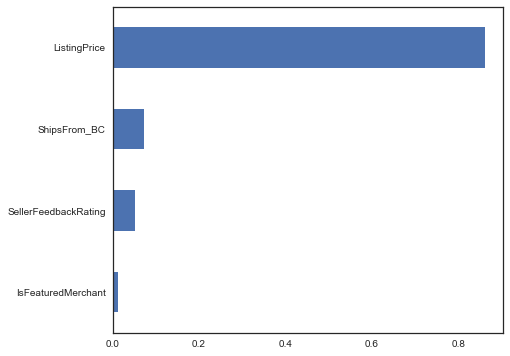

In [387]:
feature_importances = pd.Series(rfm.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace = True)
feature_importances.plot(kind="barh", figsize=(7, 6));

### Evaluation of Feature Importance:

Looking at the above graph we can clearly see that Listing Price has the highest ranking in terms of importance.

Because there is such a massive difference in feature importance between Listing Price and the next feature I am going to try a very simple model with just listing price to see how that works. 

## 4.3 Retrain the model using only the subset of features found to be promising. Evaluate the quality of the model on the training set. 

In [388]:
df.columns

Index(['IsWinner', 'IsFeaturedMerchant', 'ListingPrice',
       'SellerFeedbackRating', 'ShipsFrom_BC', 'ShipsFrom_PA'],
      dtype='object')

In [389]:
df_rf = df[['IsWinner', 'ListingPrice']]
feature_cols = ["ListingPrice"]
X = df_rf[feature_cols]
rfm2 = RandomForestRegressor(oob_score=True)
rfm2.fit(X, y)

C:\Users\pamel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [390]:
rfm2.oob_score_

0.00283005356181254

In [391]:
y_oob = rfm2.oob_prediction_
print("C-Stat: ", roc_auc_score(y, y_oob))

C-Stat:  0.739607054074


In [392]:
rfc_predictions = rfm2.predict(X)
predicted_class = list()
for i in rfc_predictions:
    if i >= 0.5:
        predicted_class.append(1)
    else:
        predicted_class.append(0)

In [393]:
df_true_vs_rfc_predicted = pd.DataFrame({'ActualClass': y, 'PredictedClass': result})
df_true_vs_rfc_predicted

ActualClass  PredictedClass
0               1               1
1               0               0
2               0               0
3               0               0
4               0               0
5               0               0
6               0               0
7               0               0
8               0               0
9               0               0
10              0               0
11              0               0
12              0               0
13              1               1
14              0               0
15              0               0
16              0               0
17              0               0
18              0               0
19              0               0
20              0               0
21              0               0
22              0               0
23              0               0
24              0               0
25              1               1
26              0               0
27              0               0
28              0               0
29              0               0
...           ...             ...
5821            0               0
5822            0               0
5823            0               0
5824            0               0
5825            0               0
5826            1               0
5827            0               0
5828            0               0
5829            0               0
5830            0               0
5831            0               0
5832            0               0
5833            0               0
5834            0               0
5835            0               0
5836            0               0
5837            0               0
5838            0               0
5839            0               0
5840            0               0
5841            0               0
5842            0               0
5843            0               0
5844            0               0
5845            0               0
5846            0               0
5847            0               0
5848            0               0
5849            0               0
5850            0               0

[5851 rows x 2 columns]

In [394]:
accuracy = metrics.accuracy_score(df_true_vs_rfc_predicted["ActualClass"], df_true_vs_rfc_predicted["PredictedClass"])
confusion_matrix = metrics.confusion_matrix(df_true_vs_rfc_predicted["ActualClass"], df_true_vs_rfc_predicted["PredictedClass"])
class_report = metrics.classification_report(df_true_vs_rfc_predicted["ActualClass"], df_true_vs_rfc_predicted["PredictedClass"])

In [395]:
print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion_matrix)
print("Classification report:\n ", class_report)

Accuracy:  0.983421637327
Confusion matrix: 
 [[5506   41]
 [  56  248]]
Classification report:
               precision    recall  f1-score   support

          0       0.99      0.99      0.99      5547
          1       0.86      0.82      0.84       304

avg / total       0.98      0.98      0.98      5851



## Evaluation Analysis: 

1. This model is slightly worse than the previous one - it is only 98% accurate and has a slightly higher number of false positives and false negatives. Although it is still much more effective than either of the linear regression or logistic regression models. 

## 4.4 Using the better model (as per evaluation on training set), print the predicted target feature value for all the examples in the training set. Print the predicted class for each example. 

In [396]:
# The first Random Forest Model was more effective so we will use this one to print the predicted target feature
feature_cols = ['IsFeaturedMerchant', 'ListingPrice', 'SellerFeedbackRating', 'ShipsFrom_BC']
X = df[feature_cols]
y = df.IsWinner
rfm = RandomForestRegressor(oob_score=True)
rfm.fit(X, y)
rfc_predictions = rfm.predict(X)
rfc_predictions

C:\Users\pamel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


array([ 1.,  0.,  0., ...,  0.,  0.,  0.])

In [397]:
# Slightly nicer display of the predictions
df_true_vs_rfc2_predicted = pd.DataFrame({'ActualClass': y, 'PredictedClass': rfc_predictions})
df_true_vs_rfc2_predicted

ActualClass  PredictedClass
0               1        1.000000
1               0        0.000000
2               0        0.000000
3               0        0.000000
4               0        0.000000
5               0        0.000000
6               0        0.000000
7               0        0.000000
8               0        0.000000
9               0        0.300000
10              0        0.000000
11              0        0.000000
12              0        0.000000
13              1        1.000000
14              0        0.000000
15              0        0.000000
16              0        0.000000
17              0        0.000000
18              0        0.000000
19              0        0.000000
20              0        0.000000
21              0        0.000000
22              0        0.000000
23              0        0.000000
24              0        0.000000
25              1        0.800000
26              0        0.000000
27              0        0.000000
28              0        0.000000
29              0        0.000000
...           ...             ...
5821            0        0.000000
5822            0        0.000000
5823            0        0.000000
5824            0        0.000000
5825            0        0.000000
5826            1        0.578333
5827            0        0.000000
5828            0        0.000000
5829            0        0.000000
5830            0        0.000000
5831            0        0.000000
5832            0        0.000000
5833            0        0.000000
5834            0        0.000000
5835            0        0.000000
5836            0        0.000000
5837            0        0.000000
5838            0        0.000000
5839            0        0.578333
5840            0        0.000000
5841            0        0.000000
5842            0        0.000000
5843            0        0.000000
5844            0        0.000000
5845            0        0.000000
5846            0        0.000000
5847            0        0.000000
5848            0        0.000000
5849            0        0.000000
5850            0        0.000000

[5851 rows x 2 columns]

# Question 5: Evaluating Predictive Models


## 5.1 Split the dataset into 70% training and remaining 30% test. Train all models from the previous exercises using the new training set and evaluate their quality on the new test set. Print classification evaluation metrics for all models on the test set (e.g., Accuracy, Confusion matrix, Precision, Recall, F1). Discuss how does evaluation on the test set compare to evaluation using the full data for training and also for testing. 

## Splitting the Data into Training and Test Sets: 

In [398]:
feature_cols = ['IsFeaturedMerchant', 'ListingPrice', 'SellerFeedbackRating', 'ShipsFrom_BC', 'ShipsFrom_PA']
X = df[feature_cols]
X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#print("Training data:\n", pd.concat([X_train, y_train], axis=1))
#print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

### Linear Regression Model 1: 

In [399]:
#train the model on the training set
df_linear = pd.concat([X_train, y_train], axis = 1)
lm = sm.ols(formula = "IsWinner ~ IsFeaturedMerchant + ListingPrice + SellerFeedbackRating + ShipsFrom_BC + ShipsFrom_PA", data=df_linear).fit()

In [400]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               IsWinner   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     86.10
Date:                Tue, 18 Apr 2017   Prob (F-statistic):           2.71e-86
Time:                        22:10:36   Log-Likelihood:                 529.60
No. Observations:                4095   AIC:                            -1047.
Df Residuals:                    4089   BIC:                            -1009.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.0050      0.026      0.197      0.844        -0.045     0.055
IsFeaturedMerchant       0.0497      0.008      5.904      0.000         0.033     0.066
ListingPrice         -9.272e-07   1.34e-05     -0.069      0.945     -2.72e-05  2.53e-05
SellerFeedbackRating -5.947e-05      0.000     -0.212      0.832        -0.001     0.000
ShipsFrom_BC             0.2862      0.015     18.911      0.000         0.257     0.316
ShipsFrom_PA            -0.0040      0.125     -0.032      0.974        -0.248     0.240
==============================================================================
Omnibus:                     3005.347   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37697.015
Skew:                           3.557   Prob(JB):                         0.00
Kurtosis:                      16.051   Cond. No.                     1.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [401]:
lm_predictions = lm.predict(X_test)
predicted_class = list()
for i in lm_predictions:
    if i >= 0.5:
        predicted_class.append(1)
    else:
        predicted_class.append(0)

In [402]:
#Evaluate the quality of the model on the test set
df_true_vs_lm_predicted = pd.DataFrame({'ActualClass': y_test, 'PredictedClass': predicted_class})

In [403]:
accuracy = metrics.accuracy_score(df_true_vs_lm_predicted["ActualClass"], df_true_vs_lm_predicted["PredictedClass"])
confusion_matrix = metrics.confusion_matrix(df_true_vs_lm_predicted["ActualClass"], df_true_vs_lm_predicted["PredictedClass"])
class_report = metrics.classification_report(df_true_vs_lm_predicted["ActualClass"], df_true_vs_lm_predicted["PredictedClass"])

C:\Users\pamel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [404]:
print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion_matrix)
print("Classification report:\n ", class_report)

Accuracy:  0.949886104784
Confusion matrix: 
 [[1668    0]
 [  88    0]]
Classification report:
               precision    recall  f1-score   support

          0       0.95      1.00      0.97      1668
          1       0.00      0.00      0.00        88

avg / total       0.90      0.95      0.93      1756



### Linear Regression Model 2

In [405]:
#Train the model on the training set
feature_cols_2 = ['IsFeaturedMerchant', 'ShipsFrom_BC', 'ShipsFrom_PA']
df_linear = df_linear[['IsWinner', 'IsFeaturedMerchant', 'ShipsFrom_BC', 'ShipsFrom_PA']]
lm_2 = sm.ols(formula = "IsWinner ~ IsFeaturedMerchant + ShipsFrom_BC + ShipsFrom_PA", data = df_linear).fit()

In [406]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               IsWinner   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     143.6
Date:                Tue, 18 Apr 2017   Prob (F-statistic):           1.93e-88
Time:                        22:10:37   Log-Likelihood:                 529.57
No. Observations:                4095   AIC:                            -1051.
Df Residuals:                    4091   BIC:                            -1026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             -0.0003      0.007     -0.045      0.964        -0.014     0.014
IsFeaturedMerchant     0.0492      0.008      6.100      0.000         0.033     0.065
ShipsFrom_BC           0.2863      0.015     18.937      0.000         0.257     0.316
ShipsFrom_PA           0.0003      0.123      0.003      0.998        -0.241     0.241
==============================================================================
Omnibus:                     3005.453   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37701.423
Skew:                           3.557   Prob(JB):                         0.00
Kurtosis:                      16.052   Cond. No.                         47.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [407]:
#Evaluate the quality of the model on the test set
lm2_predictions = lm_2.predict(X_test[feature_cols])
predicted_class = list()
for i in lm2_predictions:
    if i >= 0.5:
        predicted_class.append(1)
    else:
        predicted_class.append(0)
        
df_true_vs_lm_predicted = pd.DataFrame({'ActualClass': y_test, 'PredictedClass': predicted_class})

In [408]:
accuracy = metrics.accuracy_score(df_true_vs_lm_predicted["ActualClass"], df_true_vs_lm_predicted["PredictedClass"])
confusion_matrix = metrics.confusion_matrix(df_true_vs_lm_predicted["ActualClass"], df_true_vs_lm_predicted["PredictedClass"])
class_report = metrics.classification_report(df_true_vs_lm_predicted["ActualClass"], df_true_vs_lm_predicted["PredictedClass"])

C:\Users\pamel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [409]:
print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion_matrix)
print("Classification report:\n ", class_report)

Accuracy:  0.949886104784
Confusion matrix: 
 [[1668    0]
 [  88    0]]
Classification report:
               precision    recall  f1-score   support

          0       0.95      1.00      0.97      1668
          1       0.00      0.00      0.00        88

avg / total       0.90      0.95      0.93      1756



### Logistic Regression Model 1

In [410]:
#Train the model on the training set
feature_cols = ['IsFeaturedMerchant', 'ListingPrice', 'SellerFeedbackRating', 'ShipsFrom_BC']
logreg = sm.logit(formula="IsWinner ~ IsFeaturedMerchant + ListingPrice + SellerFeedbackRating + ShipsFrom_BC", data=df_log).fit()


         Current function value: 0.175317
         Iterations: 35


C:\Users\pamel\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [411]:
print(logreg.summary())

                           Logit Regression Results                           
Dep. Variable:               IsWinner   No. Observations:                 5851
Model:                          Logit   Df Residuals:                     5846
Method:                           MLE   Df Model:                            4
Date:                Tue, 18 Apr 2017   Pseudo R-squ.:                  0.1416
Time:                        22:10:37   Log-Likelihood:                -1025.8
converged:                      False   LL-Null:                       -1195.0
                                        LLR p-value:                 5.520e-72
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              -25.5037   1.35e+04     -0.002      0.998     -2.65e+04  2.64e+04
IsFeaturedMerchant      23.3102   1.35e+04      0.002      0.999     -2.64e+04  2.65e+04
ListingPrice

In [412]:
predictions = logreg.predict(X_test[feature_cols])

predicted_class = list()
for i in predictions:
    if i >= 0.5:
        predicted_class.append(1)
    else:
        predicted_class.append(0)
        
df_true_vs_logreg_pred = pd.DataFrame({'ActualClass': y_test, 'PredictedClass': predicted_class})

In [413]:
accuracy = metrics.accuracy_score(df_true_vs_logreg_pred["ActualClass"], df_true_vs_logreg_pred["PredictedClass"])
confusion_matrix = metrics.confusion_matrix(df_true_vs_logreg_pred["ActualClass"], df_true_vs_logreg_pred["PredictedClass"])
class_report = metrics.classification_report(df_true_vs_logreg_pred["ActualClass"], df_true_vs_logreg_pred["PredictedClass"])

C:\Users\pamel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [414]:
print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion_matrix)
print("Classification report:\n ", class_report)

Accuracy:  0.949886104784
Confusion matrix: 
 [[1668    0]
 [  88    0]]
Classification report:
               precision    recall  f1-score   support

          0       0.95      1.00      0.97      1668
          1       0.00      0.00      0.00        88

avg / total       0.90      0.95      0.93      1756



### Logistic Regression Model 2: 

In [415]:
df_newlog = df[['IsWinner', 'IsFeaturedMerchant', 'ShipsFrom_BC']]
feature_cols = ['IsFeaturedMerchant', 'ShipsFrom_BC']
logreg2 = sm.logit(formula = "IsWinner ~ IsFeaturedMerchant + ShipsFrom_BC", data=df_newlog).fit()

         Current function value: 0.175383
         Iterations: 35


C:\Users\pamel\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [416]:
print(logreg2.summary())

                           Logit Regression Results                           
Dep. Variable:               IsWinner   No. Observations:                 5851
Model:                          Logit   Df Residuals:                     5848
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 Apr 2017   Pseudo R-squ.:                  0.1413
Time:                        22:10:38   Log-Likelihood:                -1026.2
converged:                      False   LL-Null:                       -1195.0
                                        LLR p-value:                 4.775e-74
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept            -26.4101   1.51e+04     -0.002      0.999     -2.97e+04  2.97e+04
IsFeaturedMerchant    23.4525   1.51e+04      0.002      0.999     -2.97e+04  2.97e+04
ShipsFrom_BC        

In [417]:
predictions = logreg2.predict(X_test[feature_cols])

predicted_class = list()
for i in predictions:
    if i >= 0.5:
        predicted_class.append(1)
    else:
        predicted_class.append(0)
        
df_true_vs_logreg_pred = pd.DataFrame({'ActualClass': y_test, 'PredictedClass': predicted_class})


In [418]:
accuracy = metrics.accuracy_score(df_true_vs_logreg_pred["ActualClass"], df_true_vs_logreg_pred["PredictedClass"])
confusion_matrix = metrics.confusion_matrix(df_true_vs_logreg_pred["ActualClass"], df_true_vs_logreg_pred["PredictedClass"])
class_report = metrics.classification_report(df_true_vs_logreg_pred["ActualClass"], df_true_vs_logreg_pred["PredictedClass"])

C:\Users\pamel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [419]:
print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion_matrix)
print("Classification report:\n ", class_report)

Accuracy:  0.949886104784
Confusion matrix: 
 [[1668    0]
 [  88    0]]
Classification report:
               precision    recall  f1-score   support

          0       0.95      1.00      0.97      1668
          1       0.00      0.00      0.00        88

avg / total       0.90      0.95      0.93      1756



### Random Forest Model 1

In [420]:
feature_cols = ['ListingPrice', 'IsFeaturedMerchant', 'SellerFeedbackRating', 'ShipsFrom_BC', 'ShipsFrom_PA']
rfm = RandomForestRegressor(oob_score=True)
rfm.fit(X_train[feature_cols], y_train)

C:\Users\pamel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [421]:
rfm.oob_score_

-0.076419608810107231

In [422]:
#not sure whether to use y_train or y_test here? 
y_oob = rfm.oob_prediction_
print("C-Stat: ", roc_auc_score(y_train, y_oob))

C-Stat:  0.745037977524


In [423]:
predictions = rfm.predict(X_test[feature_cols])

predicted_class = list()
for i in predictions:
    if i >= 0.5:
        predicted_class.append(1)
    else:
        predicted_class.append(0)
        
df_true_vs_rfm_pred = pd.DataFrame({'ActualClass': y_test, 'PredictedClass': predicted_class})

In [424]:
accuracy = metrics.accuracy_score(df_true_vs_rfm_pred["ActualClass"], df_true_vs_rfm_pred["PredictedClass"])
confusion_matrix = metrics.confusion_matrix(df_true_vs_rfm_pred["ActualClass"], df_true_vs_rfm_pred["PredictedClass"])
class_report = metrics.classification_report(df_true_vs_rfm_pred["ActualClass"], df_true_vs_rfm_pred["PredictedClass"])

In [425]:
print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion_matrix)
print("Classification report:\n ", class_report)

Accuracy:  0.938496583144
Confusion matrix: 
 [[1613   55]
 [  53   35]]
Classification report:
               precision    recall  f1-score   support

          0       0.97      0.97      0.97      1668
          1       0.39      0.40      0.39        88

avg / total       0.94      0.94      0.94      1756



### Random Forest Model 2

In [426]:
feature_cols = ['ListingPrice']
rfm2 = RandomForestRegressor(oob_score=True)
rfm2.fit(X_train[feature_cols], y_train)

C:\Users\pamel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

In [427]:
rfm2.oob_score_

-0.095295176796352354

In [428]:
y_oob = rfm2.oob_prediction_
print("C-Stat: ", roc_auc_score(y_train, y_oob))

C-Stat:  0.703970453439


In [429]:
predictions = rfm2.predict(X_test[feature_cols])

predicted_class = list()
for i in predictions:
    if i >= 0.5:
        predicted_class.append(1)
    else:
        predicted_class.append(0)
        
df_true_vs_rfm2_pred = pd.DataFrame({'ActualClass': y_test, 'PredictedClass': predicted_class})

In [430]:
accuracy = metrics.accuracy_score(df_true_vs_rfm2_pred["ActualClass"], df_true_vs_rfm2_pred["PredictedClass"])
confusion_matrix = metrics.confusion_matrix(df_true_vs_rfm2_pred["ActualClass"], df_true_vs_rfm2_pred["PredictedClass"])
class_report = metrics.classification_report(df_true_vs_rfm2_pred["ActualClass"], df_true_vs_rfm2_pred["PredictedClass"])

In [431]:
print("Accuracy: ", accuracy)
print("Confusion matrix: \n", confusion_matrix)
print("Classification report:\n ", class_report)

Accuracy:  0.938496583144
Confusion matrix: 
 [[1621   47]
 [  61   27]]
Classification report:
               precision    recall  f1-score   support

          0       0.96      0.97      0.97      1668
          1       0.36      0.31      0.33        88

avg / total       0.93      0.94      0.94      1756



## Evaluation Comparison Analysis: 

1. We can see no difference between the linear models trained and tested on the whole set and those trained and tested with the split set. 
2. The same goes for the logistic models. 
3. However, with the random forest we can see that the accuracy of the model is reduced by a few percent. This is valuable in that it shows us how testing the model on the same data you trained it on can produce a falsely high accuracy. 

## 5.2 Summarize and try to improve your results so far

## 5.2.1 Which model performs best and is it more accurate than a simple (but useless) model that always predicts IsWinner=0? Justify your answers. 

### The Random Forest Model definitely performed best. When trained on the training set and tested on the testing set it had an accuracy of 94% which is a pretty good model. This is surely preferable to a simple model that always predicts IsWinner = 0. Keep in mind that although the model has 94% accuracy it is not exactly the truth of the evaluation. Because there are a disproportionate number of the negative class we should also look at the percentage of true positives that the model was able to predict: 39%. We were able to predict a correct case of the positive class 39% of the time. This is still better than either of the linear or logistic regression models but would it be deployable in a real business scenario? Possibly not. 

## 5.2.2 Discuss your understanding of the problem and predictive modeling results so far. Can you find  any tricks to improve the best model so far (e.g., using feature significance, feature rescaling, creating new features, combining models, or other knowledge)?

### Discussion of the Problem and the Data Set:

Having analysed the data set in depth I can see that there is no one feature that determines whether or not an offer will be determined a winner. It makes sense that a Random Forest model works better in this case because we don't have a clear numerical relationship between any one feature and the target feature. 

### Possible Improvements: 

1. We discussed in class the concept of ensembling. I think that using this in conjunction with Random Forest could produce a better outcome. Random Forest was the only model that predicted in the positive class (albeit exclusively so still useless). Perhaps introducing ensembling would give the model a better chance of predicting at a higher accuracy. 
2. We also discussed in class the concept of decision trees. These could be very useful for a problem like this where there is no one feature that determines a winner, but a number that have different levels of influence on the outcome. We could break down the problem so as to rule out edge cases (such as Listing Prices under 1500) and continue in this way until we have a good idea of which cases are likely to be in the positive clas. We could also weight different questions depending on the strength of the correlation between the descriptive feature in question and the target feature. 

## References: 

1. http://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
2. http://pandas.pydata.org/pandas-docs/stable/10min.html
3. http://stackoverflow.com/questions/25125168/array-shape-giving-error-tuple-not-callable
4. http://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns
5. http://stackoverflow.com/questions/20209600/panda-dataframe-remove-constant-column
6. http://stackoverflow.com/questions/19482970/get-list-from-pandas-dataframe-column-headers
7. http://stackoverflow.com/questions/36185883/python-pandas-dataframe-remove-columns-from-header
8. https://chrisalbon.com/python/pandas_dropping_column_and_rows.html
9. http://pandas.pydata.org/pandas-docs/version/0.18.1/generated/pandas.DataFrame.to_csv.html
10. http://stackoverflow.com/questions/20107570/removing-index-column-in-pandas
11. http://stackoverflow.com/questions/9012487/matplotlib-pyplot-savefig-outputs-blank-image
12. http://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value
13. http://stackoverflow.com/questions/29017525/deleting-rows-based-on-multiple-conditions-python-pandas
14. Lab Notebook - Notebook-Linear-Regression
15. Lab Notebook - Notebook-Modeling-Logistic-Regression
16. Lab Notebook - Notebook-Modeling-Random-Forest
17. Lab 4 Notebook
18. https://www.youtube.com/watch?v=0GrciaGYzV0&list=PLx1nh9sMznmKoUjw6uHR2enxCrenhn5zD&index=4
19. https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb